In [1]:
import matplotlib.pyplot as plt
from os import path
import pandas as pd
import seaborn as sns

from src.ingest_data import ingest_data_dir
from src.query_data import get_flags_captured, get_flag_time_taken, get_avg_flag_time_taken, get_flag_time_taken_pd

In [2]:
telemetry_experiments = ingest_data_dir(path.join('data', 'enterprise_telemetry'))

capability_experiments = ingest_data_dir(path.join('data', 'enterprise_capabilities_2'))

# Remove 'enterprise_' prefix from experiment names
telemetry_experiments = {k.replace('enterprise_', ''): v for k, v in telemetry_experiments.items()}
capability_experiments = {k.replace('enterprise_', ''): v for k, v in capability_experiments.items()}

In [3]:
flags = get_flags_captured(telemetry_experiments)

# Output as csv
flags.to_csv(path.join('output', 'telemetry_flags.csv'))

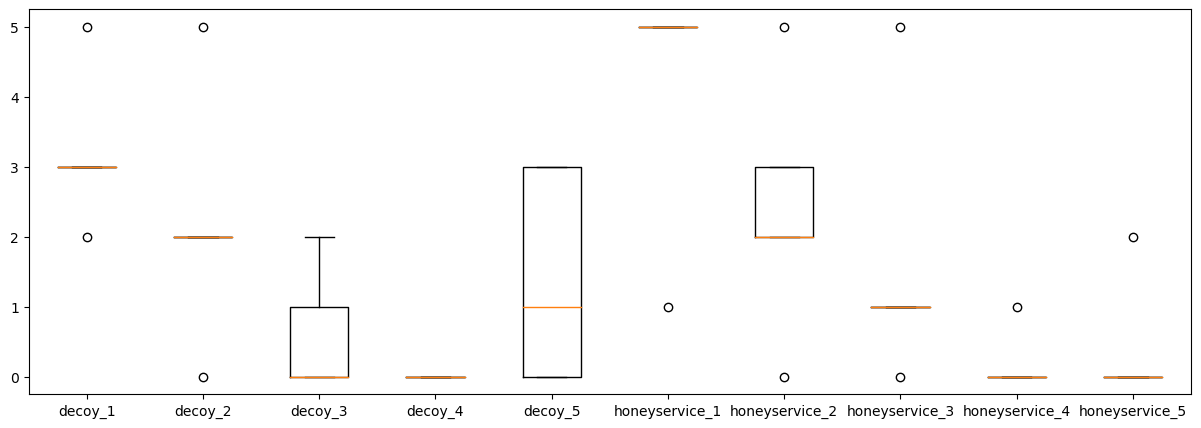

In [4]:
labels = flags.columns
# Remove 'enterprise_' from each label
labels = [label.replace('enterprise_', '') for label in labels]


fig, ax = plt.subplots()
# make figure wider
fig.set_size_inches(15, 5)

# Plot boxplot of flags captured
# Use columns as x-axis labels
# Use values as y-axis values
ax.boxplot(flags.values, labels=labels)

plt.show()

In [5]:
# 5 flags
flag_nums = [1, 2, 3, 4, 5]
time_taken_per_flag = get_flag_time_taken(telemetry_experiments, flag_nums)
avg_time_taken_per_flag = get_avg_flag_time_taken(telemetry_experiments, flag_nums)

print(avg_time_taken_per_flag)

{'decoy_1': [5.284998943010966, 5.434998943010966, 5.564186827341715, 9.340551547209422, 9.423884880542754], 'decoy_2': [8.41366378068924, 8.559497114022573, 8.66343822479248, 12.26343822479248, 12.36343822479248], 'decoy_3': [6.9885975301265715, 7.784970506032308], 'decoy_4': [], 'decoy_5': [9.337663227981992, 10.030255115032196, 10.196921781698862], 'honeyservice_1': [4.5597687697410585, 4.803493161002795, 5.011826494336129, 8.786826494336129, 8.932659827669461], 'honeyservice_2': [5.818893198172251, 6.5938931981722515, 6.845049355427424, 9.321179942289989, 9.487846608956655], 'honeyservice_3': [5.646466016769409, 5.109507298469543, 5.27617396513621, 9.209507298469543, 9.37617396513621], 'honeyservice_4': [6.879006322224935], 'honeyservice_5': [6.3613876581192015, 6.444720991452535]}


In [6]:
capability_one_flag = get_flag_time_taken_pd(telemetry_experiments, 1)
telemetry_one_flag = get_flag_time_taken_pd(capability_experiments, 1)

In [7]:
capability_one_flag = capability_one_flag.assign(type='capability')
telemetry_one_flag = telemetry_one_flag.assign(type='telemetry')


test = pd.concat([capability_one_flag, telemetry_one_flag])

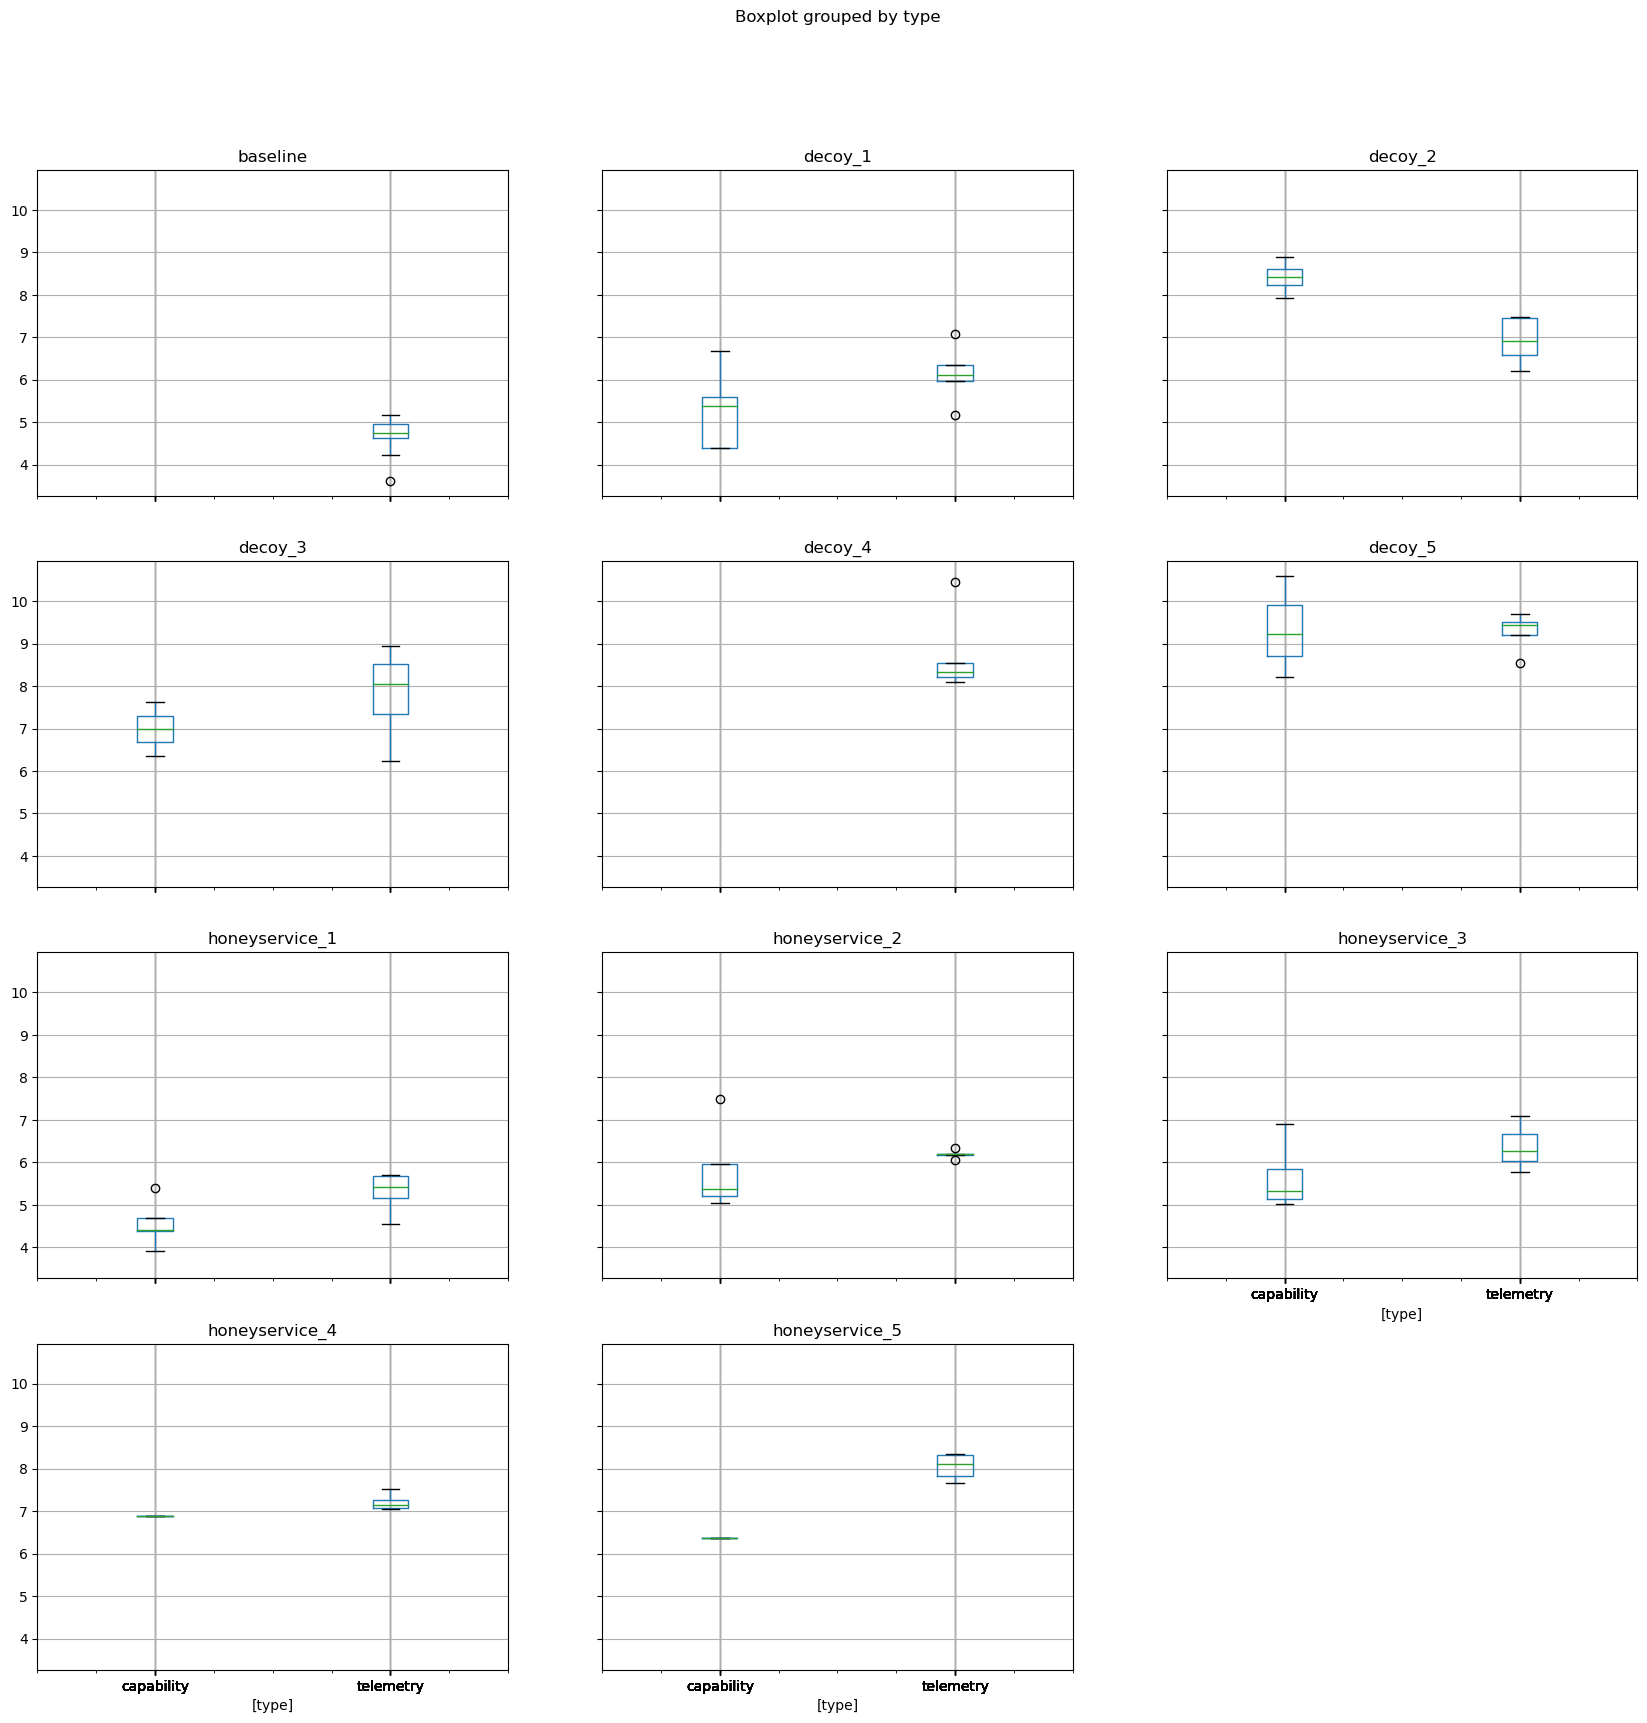

In [13]:
plot = test.boxplot(by='type', figsize=(20, 20))

<Axes: xlabel='type', ylabel='baseline'>

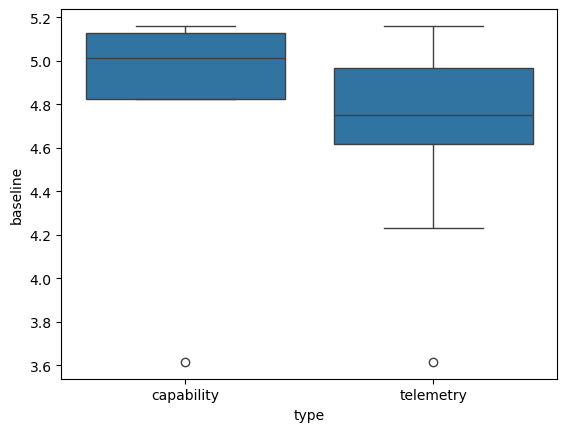

In [22]:
sns.boxplot(x='type', y='baseline', data=test)